## EDA по данным риелторской компании

В файле clients.csv предоставлена информация о клиентах риелторской компании США за один месяц. Вам необходимо как специалисту по Data Science сделать следующее:

Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).

Таким образом после вашего анализа, я хочу увидеть описание нашего целевого клиента с соответствующими визуализациями. Ожидаю увидеть как минимум 5 графиков с комментариями. Отнеситесь к заданию достойно, представьте, что от Вашего отчета зависит принятие важного решения.

---

**Баллы могут быть снижены** за качество кода - старайтесь чтобы код был максимально лаконичным. Названия переменных (если они используются) должны отражать максимальную ее сущность.

**Комментарии по сдаче практического задания**:
1. Залить в репу на github в папку module_2/descriptive_stats
2. Ссылку на репо отправлять мне на почту alexadevv@gmail.com не позднее дедлайна.
3. Тема письма: Домашнее задание по модулю 2 <Фамилия Имя>
4. После дедлайна, неотправленные на почту задания, оцениваются максимум в 7 баллов.

# Знакомимся с датасетом

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv('./clients.csv')

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,195.0,2591.425641,1244.617996,1002.00,2003.50,2054.00,3048.50,5051.0
Building,195.0,2.564103,1.243434,1.00,2.00,2.00,3.00,5.0
Year of sale,195.0,2006.333333,1.072941,2004.00,2006.00,2007.00,2007.00,2010.0
Month of sale,195.0,7.271795,3.378674,1.00,4.00,8.00,10.00,12.0
Property number,195.0,27.328205,14.830832,1.00,15.00,27.00,39.00,59.0
Area (ft.),195.0,899.867128,261.489550,410.71,739.86,785.48,1075.46,1942.5
Age at time of purchase,178.0,46.151685,12.841692,19.00,37.00,45.00,55.00,76.0
Y,178.0,1960.325843,12.835575,1931.00,1950.25,1962.00,1969.75,1986.0
M,178.0,6.752809,3.450312,1.00,4.00,6.00,9.75,15.0
D,178.0,15.449438,8.457285,1.00,8.00,15.00,23.75,31.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

In [7]:
pd.set_option('display.max_columns', None)
data.head(5)

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,Entity,Name,Surname,Age at time of purchase,Age Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,Individual,Madalyn,Mercer,19.0,18-25,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,Individual,Lara,Carrillo,22.0,18-25,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,Individual,Donavan,Flowers,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,Individual,Darien,Dorsey,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,Individual,Alessandra,Perry,25.0,18-25,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [8]:
data.columns

Index(['ID', 'Building', 'Year of sale', 'Month of sale', 'Type of property',
       'Property number', 'Area (ft.)', 'Price', 'Status', 'Customer ID',
       'Entity', 'Name', 'Surname', 'Age at time of purchase', 'Age Interval ',
       'Y', 'M', 'D', 'Gender', 'Country', 'State', 'Purpose',
       'Deal satisfaction', 'Mortgage', 'Source'],
      dtype='object')

In [9]:
data.columns = ['id', 'building', 'y_of_sale', 'm_of_sale', 'type_of_property',
       'property_num', 'area', 'price', 'status', 'customer_id',
       'entity', 'name', 'surname', 'age_at_time_of_purchase', 'age_interval',
       'y', 'm', 'd', 'gender', 'country', 'state', 'purpose',
       'deal_satisf', 'mortgage', 'source']

Переведём значения price в float для дальнейших манипуляци

In [11]:
data['price'] = data['price'].apply(lambda x: x.replace('$', '').replace(',', '').replace(' ', '') if isinstance(x, str) else x).astype(float)

## Очистим те данные которые содержат путые значения

Судя по info у нас в датасете отсутствуют некоторые данные о возрасте клиентов и о штатх в которых проводились операции с недвижимостью. Для проведения честной аналитики (и поскольку данных у нас не так то и много) было принято решение использовать для визуализации 3 датасета. Для графиков для которых нет отсутствующих данных будет использоваться весь датасет, для визуализации информации связанной с возростом и полом будет использоваться дата сет с удалённой колонкой state. А для визуализации данных с штатами в последствии (ближе к концу файла) будет создан отдельный датасет.

In [13]:
data_cleared = data.copy()

In [14]:
del data_cleared['state']

In [15]:
data_cleared.dropna(inplace=True)

In [16]:
data_cleared.shape

(178, 24)

### Глянем соотношение сколько покупателей как фирм и как частные лица. 

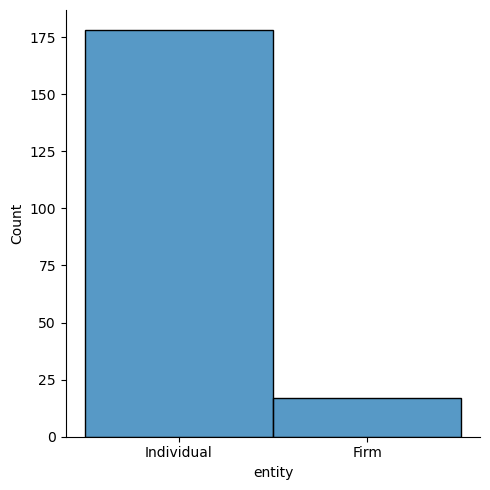

In [18]:
sns.displot(data, x="entity")

Явный перевес в сторону индивидуальных покупателей.

### Построим pairplot, для непрерывных данных

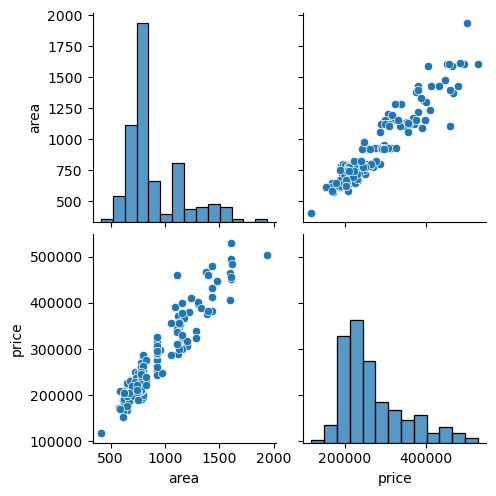

In [21]:
sns.pairplot(data[['area', 'price']])

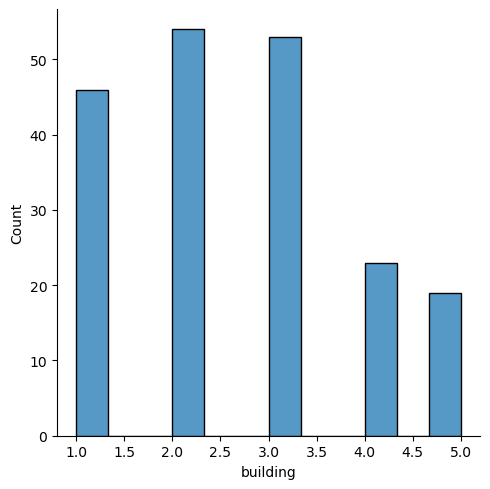

In [22]:
sns.displot(data, x="building")

In [23]:
data['area'].median(), data['price'].median()

(785.48, 243052.59)

In [24]:
import statistics
statistics.mode(data['building'])

2

Видим явную положительную зависимость цены от площади апартаментов. Так же собираем медианные значения по площади и цене, которые составляют 785 м^2 и 243_052.59$. Сюда же отнесём количество приобритаемых построек, возьмём моду по количеству построек - это 2

### Так же построим график зависимости цены от площади, и наложим на него возрастные группы.

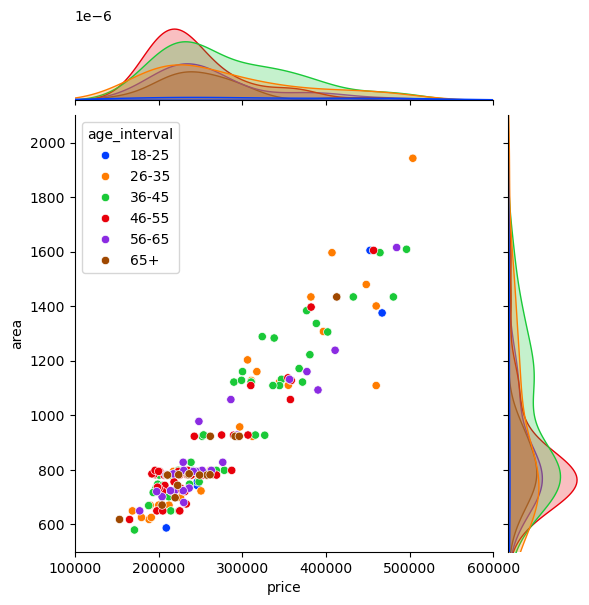

In [27]:
sns.jointplot(
    x='price', 
    y='area', 
    data=data_cleared,  
    xlim=(100_000, 600_000),
    ylim=(500, 2100),
    palette='bright',
    hue='age_interval');

In [28]:
data['age_interval'].value_counts()

age_interval
36-45    52
46-55    41
26-35    36
56-65    26
65+      18
18-25     5
Name: count, dtype: int64

Обращаем внамание на три первые возростные группы, 36-45, 46-55 и 26-35

### Посмотрим на соотношение цены к возросту клиентов и наложим показатель куплены апартаменты в ипотеку или нет

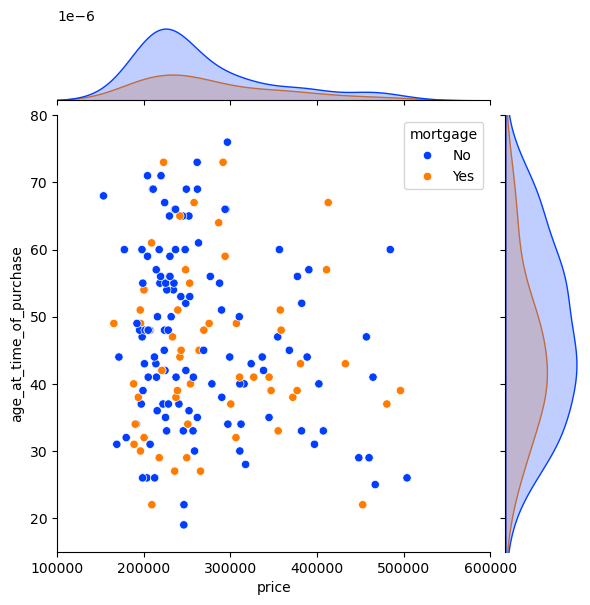

In [31]:
sns.jointplot(
    x='price', 
    y='age_at_time_of_purchase', 
    data=data_cleared,  
    xlim=(100_000, 600_000),
    ylim=(15, 80),
    palette='bright',
    hue='mortgage');

Видим, что большая часть покупателей предпочитает покупку единовременным платежём. При этом нет прямой зависимости приобретения в ипотку от возроста. А зависимоть от цены небольшая но всё же есть, если смотреть медиану, то приобретение за единовременный платёж значительно превышает ипотеку, но с повышением цены, эти значения почти уравниваются.

### Посмотрим плотность распределения покупателей мужского и женского пола к возрасту

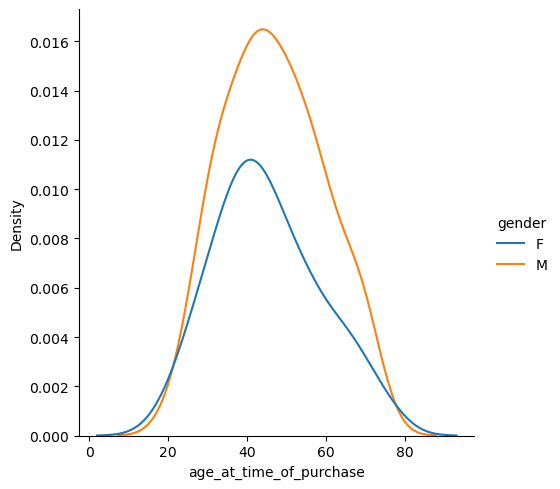

In [34]:
sns.displot(data_cleared, x="age_at_time_of_purchase", hue="gender", kind="kde")

In [35]:
data_cleared['gender'].value_counts()

gender
M    108
F     70
Name: count, dtype: int64

In [36]:
pd.pivot_table(data_cleared, index='gender', values='age_at_time_of_purchase', aggfunc='median')

,age_at_time_of_purchase
gender,
F,43.5
M,46.0


Видим что большая часть покупателей - мужчины

### Рассмотрим цель покупки, и заодно посмотрим где же приобретают клиенты недвижимость

Что бы не терять данные создам ещё 1 очищеный дата сет, что бы посмотреть распределение по штатам.

In [40]:
data_states_cleared = data[['state', 'purpose', 'source']].dropna().reset_index()

data_states_cleared.shape

(181, 4)

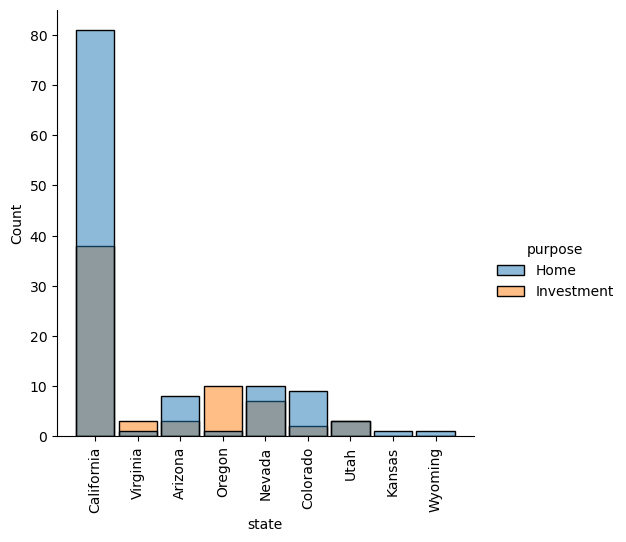

In [41]:
a = sns.displot(data_states_cleared, x="state", hue='purpose', binwidth=1, shrink=.9)
a.set_xticklabels(rotation = 90)

### Рассмотрим источник, каким образом происходила покупка и удовлетворённость покупателей.

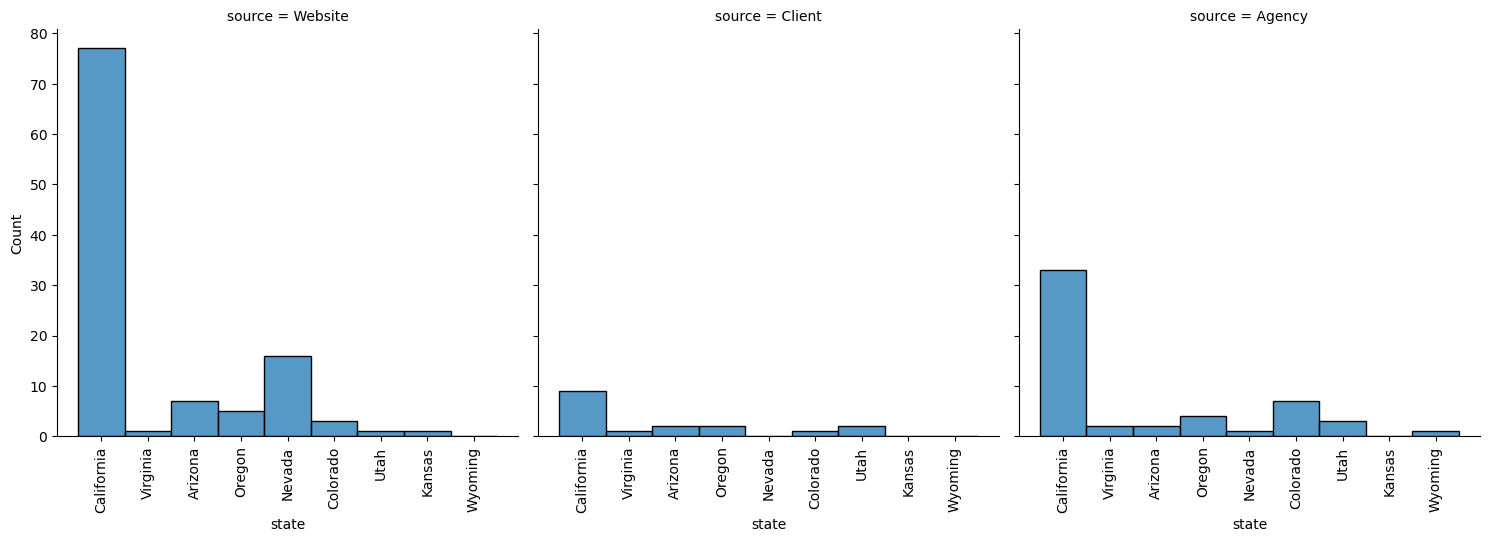

In [43]:
pr_pl = sns.displot(data_states_cleared, x="state", col="source")
pr_pl.set_xticklabels(rotation = 90)

Видим что, риелторская компания сосредоточена на западе США, и подавляющее преимущество операций с недвижимостью происходят в Калифорнии, в основном клиенты приобретают недвижимость для личного пользования, нежели как инвестицию. Интересно отметить штат Орегон. Конечно, наша выборка очень слабо отражает динамику по всем штатам, кроме Калифорнии, но тем не менее, согласно нашей выборке, в Орегоне преобладают покупки недвижимости для инвестиций. Если немного почитать про данный штат, можно заметить, что Орегон отличается обилием пейзажей и культурным разнообразием, а значит развитым туристическим направлением, по этому не удивительно, что здесь покупки нацелены на инвестиции и, скорее всего, в туризм.

Оценку удовлетворённости сделкой можно взять по всему датасету

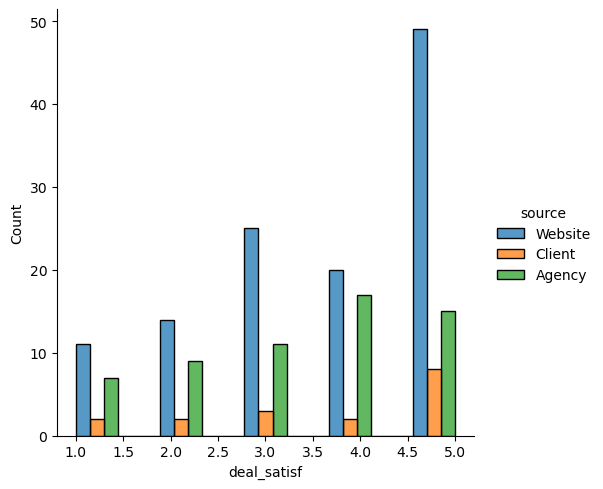

In [46]:
sns.displot(data, x="deal_satisf", hue="source", multiple="dodge")

In [47]:
pd.pivot_table(data, index='source', values='deal_satisf', aggfunc='mean')

,deal_satisf
source,
Agency,3.406780
Client,3.705882
Website,3.689076


# Вывод

Наш покупатель, преимущественно мужчина, средних лет(медианное значение для мужчин 46 лет, для женщин 43 года), приобретает недвижимость как физическое лицо, в основном не пользуется ипотекой, предпочитая покупать недвижимость за единый платёж. Медианная площадь покупаемых апартаментов  785.48 м^2, а медианная цена 243052.59$, количество приобретаемых построек варьируется от 1 до 5, самый популярный показатель: 2 приобретаемые постройки. Основным штатом, где происходят сделки является Калифорния. Преобладающая цель покупки: для личного пользования. Подавляющее количество обращений проходят через Website, а минимальная через Client. Стоит обратить внимание на качество работы через Agancy, так как у них самая низкая оценка удовлетворённости сделкой. 